In [1]:
pip install gym gym_anytrading stable-baselines3 shimmy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 9.1 MB/s eta 0:00:00


In [4]:
import gym
import gym_anytrading
from gym_anytrading.envs import TradingEnv, ForexEnv, StocksEnv, Actions, Positions
from gym_anytrading.datasets import FOREX_EURUSD_1H_ASK, STOCKS_GOOGL
import matplotlib.pyplot as plt
from stable_baselines3 import A2C
from stable_baselines3 import common
from stable_baselines3.common.env_util import make_vec_env
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(


In [5]:
df = pd.read_csv('/content/drive/MyDrive/relativestrength/eurusd-5m.csv', delimiter = ";", header = None)
df['Datetime'] = df[0] + ' ' + df[1]
df = df[-100000:-10000]
#df = df[-10000:]
df.index = pd.to_datetime(df['Datetime'])
df = df.drop(columns = [0, 1, 'Datetime'])
column_names = ['Open', 'High', 'Low', 'Close', 'Volume']
df.columns = column_names
df

,Open,High,Low,Close,Volume
Datetime,,,,,
2022-11-04 12:40:00,1.08823,1.08849,1.08808,1.08848,588
2022-11-04 12:45:00,1.08848,1.08883,1.08847,1.08864,708
2022-11-04 12:50:00,1.08864,1.08869,1.08837,1.08839,421
2022-11-04 12:55:00,1.08839,1.08844,1.08820,1.08822,559
2022-11-04 13:00:00,1.08822,1.08833,1.08807,1.08833,830
...,...,...,...,...,...
2023-06-20 04:25:00,1.09288,1.09309,1.09285,1.09297,934
2023-06-20 04:30:00,1.09296,1.09315,1.09288,1.09308,736
2023-06-20 04:35:00,1.09308,1.09328,1.09274,1.09289,744


In [6]:
df = yf.download('AAPL')

[*********************100%%**********************]  1 of 1 completed


In [7]:
df = df[8000:9000]

In [8]:
env = gym.make('stocks-v0', df=df, frame_bound=(20,len(df)), window_size=20)

In [9]:
for i in range(10):
  observation = env.reset()
  while True:
      action = env.action_space.sample()
      observation, reward, done, info = env.step(action)
      if done:
          print("info:", info)
          break

info: {'total_reward': 10.196423530578613, 'total_profit': 0.03616937314098111, 'position': 0}
info: {'total_reward': 0.020353317260742188, 'total_profit': 0.02602297413544539, 'position': 1}
info: {'total_reward': 9.910713195800781, 'total_profit': 0.03800588566852922, 'position': 0}
info: {'total_reward': 9.126800537109375, 'total_profit': 0.036095638875368416, 'position': 1}
info: {'total_reward': -0.5467844009399414, 'total_profit': 0.023720889795409855, 'position': 0}
info: {'total_reward': 6.536429405212402, 'total_profit': 0.03360307103992027, 'position': 0}
info: {'total_reward': 2.9121522903442383, 'total_profit': 0.023594182676178483, 'position': 0}
info: {'total_reward': 7.912842750549316, 'total_profit': 0.03302710351619075, 'position': 0}
info: {'total_reward': 1.375737190246582, 'total_profit': 0.025223358593435444, 'position': 1}
info: {'total_reward': 5.640353202819824, 'total_profit': 0.03643336305915161, 'position': 1}


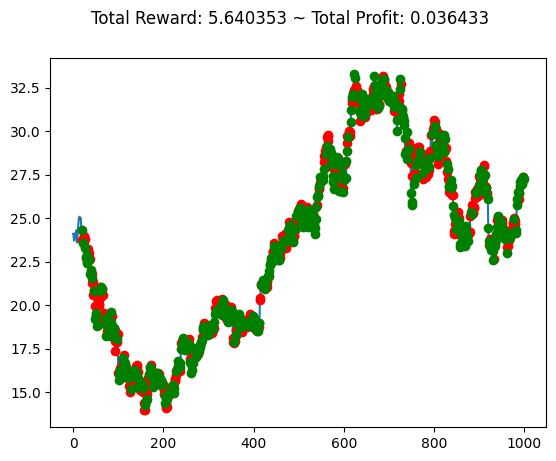

In [10]:
env.render_all()

In [11]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(20,len(df)), window_size=20)
env = common.vec_env.DummyVecEnv([env_maker])

In [12]:
model = A2C('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=1000000, progress_bar=True)

Output()

Using cpu device
-------------------------------------
| time/                 |           |
|    fps                | 307       |
|    iterations         | 100       |
|    time_elapsed       | 1         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -0.431    |
|    explained_variance | 0.228     |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | -0.000472 |
|    value_loss         | 9.23e-06  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 386      |
|    iterations         | 200      |
|    time_elapsed       | 2        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.3     |
|    explained_variance | -0.021   |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | 0.000718 |
|    va

KeyboardInterrupt: ignored

In [15]:
df = yf.download('AAPL')

[*********************100%%**********************]  1 of 1 completed


In [16]:
df = df[9000:9200]

In [17]:
env = gym.make('stocks-v0', df=df, frame_bound=(20,len(df)), window_size=20)
obs = env.reset()
while True:
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 1.3674945831298828, 'total_profit': 0.5220869941694073, 'position': 0}


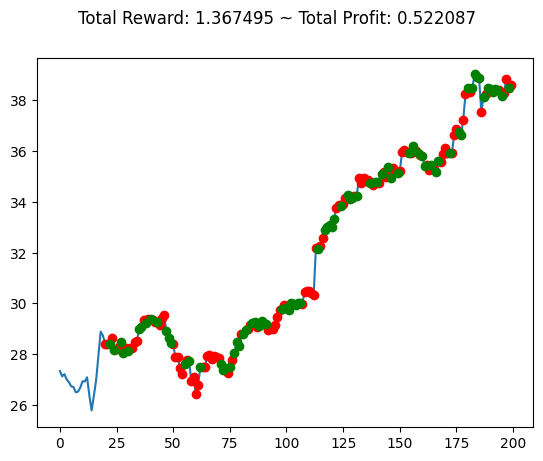

In [18]:
env.render_all()

##QunatStats


In [ ]:
pip install quantstats

In [ ]:
import quantstats as qs
import yfinance as yf

In [ ]:
qs.extend_pandas()

In [ ]:
data = yf.download('AAPL')['Adj Close']

In [ ]:
data = data.pct_change()[1:]

In [ ]:
data

In [ ]:
qs.reports.html(data, output='SB3_quantstats.html', download_filename = 'a2c_quantstats.html')